### Import libraries

In [1]:
import os
import sys
import pandas as pd
import datetime
import numpy as np
import warnings
warnings.filterwarnings('ignore') 
#import xlsxwriter
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.relativedelta import relativedelta


In [3]:
import pandas_gbq

In [21]:
# query_bq="SELECT distinct display_name FROM `data-team-318806.books_db.books`"

In [33]:
query_bq="SELECT display_name \
,SPLIT(display_name, ' ')[OFFSET(0)] AS counterparty \
,SPLIT(display_name, ' ')[OFFSET(1)] AS country \
,SPLIT(display_name, ' ')[OFFSET(2)] AS month_text \
,SPLIT(display_name, ' ')[OFFSET(3)] AS year \
,current_balance \
,phone_flag \
,phone_val \
,email_flag \
,email_val \
,dpd \
,dca_placement \
, paid_last_12_months \
,ak_id \
FROM `data-team-318806.books_db.books` \
where 1=1 \
and lower(display_name) like '%moneyspot%' \
and lower(display_name) like '%au%' \
and lower(display_name) not like '%backbook%'"

In [35]:
df = pandas_gbq.read_gbq(query_bq
                        ,project_id="data-team-318806")


Downloading: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████|


In [69]:
df.tail()

,display_name,counterparty,country,month_text,year,current_balance,phone_flag,phone_val,email_flag,email_val,dpd,dca_placement,paid_last_12_months,ak_id,month_number,yearmonth
50699,MoneySpot AU June 2023,MoneySpot,AU,June,2023,805.01,1,1,1,1,49,0,1,b46b9abb-666c-48d1-807d-b2114d4b68c8,6,202306
50700,MoneySpot AU June 2023,MoneySpot,AU,June,2023,690.00,1,1,1,1,37,0,1,8ef6800e-a1f1-4d9a-87ee-f22cfadbb139,6,202306
50701,MoneySpot AU June 2023,MoneySpot,AU,June,2023,373.00,1,1,1,1,34,0,1,7a5048b2-2f8d-4645-8007-24fc5943910c,6,202306
50702,MoneySpot AU June 2023,MoneySpot,AU,June,2023,2782.57,1,1,1,1,44,0,1,f7696304-2d00-4a0f-a68d-f93bbec8ba79,6,202306
50703,MoneySpot AU June 2023,MoneySpot,AU,June,2023,857.00,1,1,1,1,50,0,1,95f23e44-75b0-4222-af6e-90d5569c077c,6,202306


In [45]:
df.shape

(50704, 15)

In [53]:
month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'June':6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

In [55]:
df['month_number'] = df['month_text'].map(month_mapping)

In [113]:
df['month_number']=df['month_number'].astype(int)

In [117]:
df['year']=df['year'].astype(int)

In [119]:
df['yearmonth']=df['year'].astype(int)*100+df['month_number'].astype(int)

In [129]:
df['year'].unique()

array([2023, 2024, 2022])

In [153]:
df['year_month_date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month_number'].astype(str) + '-01')

In [155]:

# df['yearmonth_v1'] = pd.to_datetime(df.assign(day=1).loc[:, ['year', 'month_number', 'day']])

In [157]:
df.head()

,display_name,counterparty,country,month_text,year,current_balance,phone_flag,phone_val,email_flag,email_val,dpd,dca_placement,paid_last_12_months,ak_id,month_number,yearmonth,yearmonth_v1,year_month_date
0,MoneySpot AU Apr 2023,MoneySpot,AU,Apr,2023,2819.89,1,1,1,0,50,0,1,1227c565-a767-44bd-955a-0ffcbb090c23,4,202304,2023-04-01,2023-04-01
1,MoneySpot AU Apr 2023,MoneySpot,AU,Apr,2023,915.00,1,1,1,1,92,0,1,58327769-1a90-4f10-bb41-c1c1397805e7,4,202304,2023-04-01,2023-04-01
2,MoneySpot AU Apr 2023,MoneySpot,AU,Apr,2023,865.00,1,1,1,1,67,0,0,870477f7-6595-4eeb-9358-5daf890a6f23,4,202304,2023-04-01,2023-04-01
3,MoneySpot AU Apr 2023,MoneySpot,AU,Apr,2023,281.68,1,1,1,1,73,0,1,f210a42d-186b-43a3-9c85-abe7f7f41066,4,202304,2023-04-01,2023-04-01
4,MoneySpot AU Apr 2023,MoneySpot,AU,Apr,2023,2645.13,1,1,1,1,39,0,1,eacc35bf-8b69-4c7c-bb5d-43afeb524eca,4,202304,2023-04-01,2023-04-01


In [159]:
#####Analysis on current_balance

In [161]:
df_cur_balance=df.groupby('year_month_date')[['current_balance']].sum().reset_index().copy()

In [163]:
df_cur_balance.head()

,year_month_date,current_balance
0,2022-09-01,1654770.80
1,2022-10-01,1995610.34
2,2022-11-01,1863655.12
3,2022-12-01,2402279.62
4,2023-01-01,2785640.83


In [165]:
df_cur_balance.shape

(24, 2)

In [266]:
df_average = df_cur_balance['current_balance'].mean()

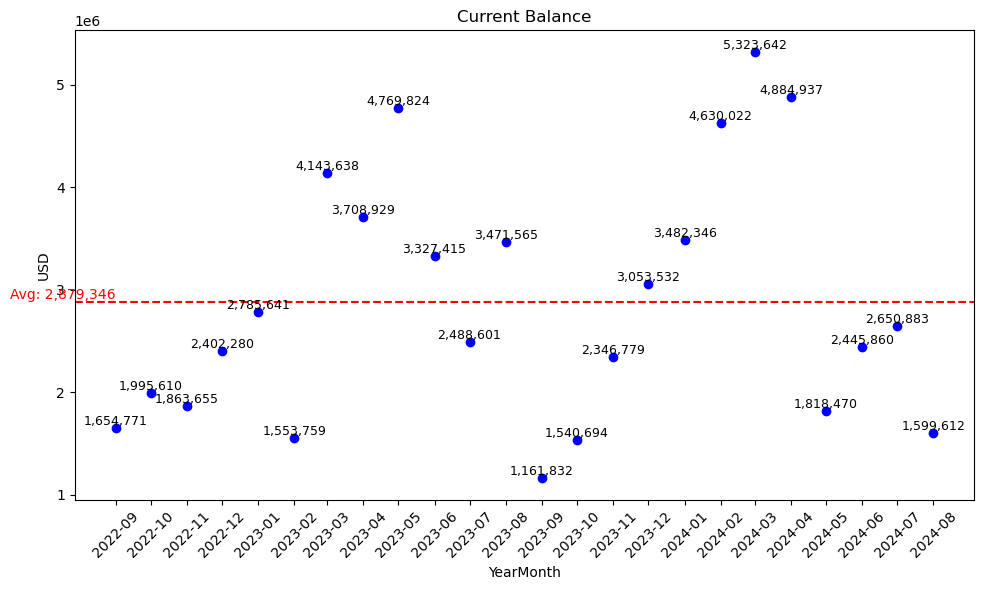

In [268]:
plt.figure(figsize=(10, 6))  # Make the figure wider
plt.scatter(df_cur_balance['year_month_date'], df_cur_balance['current_balance'], color='blue')

# Add labels and title
plt.xlabel('YearMonth')
plt.ylabel('USD')
plt.title('Current Balance')

# Rotate x-axis labels for better readability (optional)

x_labels = df_cur_balance['year_month_date'].dt.strftime('%Y-%m-%d')  # Format as string
short_x_labels = x_labels.str.slice(0, 7)  # Get the first 6 letters

plt.xticks(df_cur_balance['year_month_date'], short_x_labels, rotation=45)


# Annotate each point with its y-value (current_balance)
for i, value in enumerate(df_cur_balance['current_balance']):
    plt.text(df_cur_balance['year_month_date'][i], df_cur_balance['current_balance'][i], 
             f'{value:,.0f}', ha='center', va='bottom', fontsize=9)


plt.axhline(y=df_average, color='red', linestyle='--', label=f'Average DPD: {df_average:,.0f}')

plt.text(df_dpd['year_month_date'].min(), df_average, f'Avg: {df_average:,.0f}', 
         color='red', va='bottom', ha='right', fontsize=10)

# Show plot
plt.tight_layout()  # To make sure labels are not cut off
plt.show()

In [198]:
###without normalization, no trend, or seasonality

In [ ]:
#### Average Balance

In [202]:
df_cur_balance_avg=df.groupby('year_month_date')[['current_balance']].mean().reset_index().copy()

In [250]:
df_average = df_cur_balance_avg['current_balance'].mean()

In [254]:
df_average

1388.8823015117314

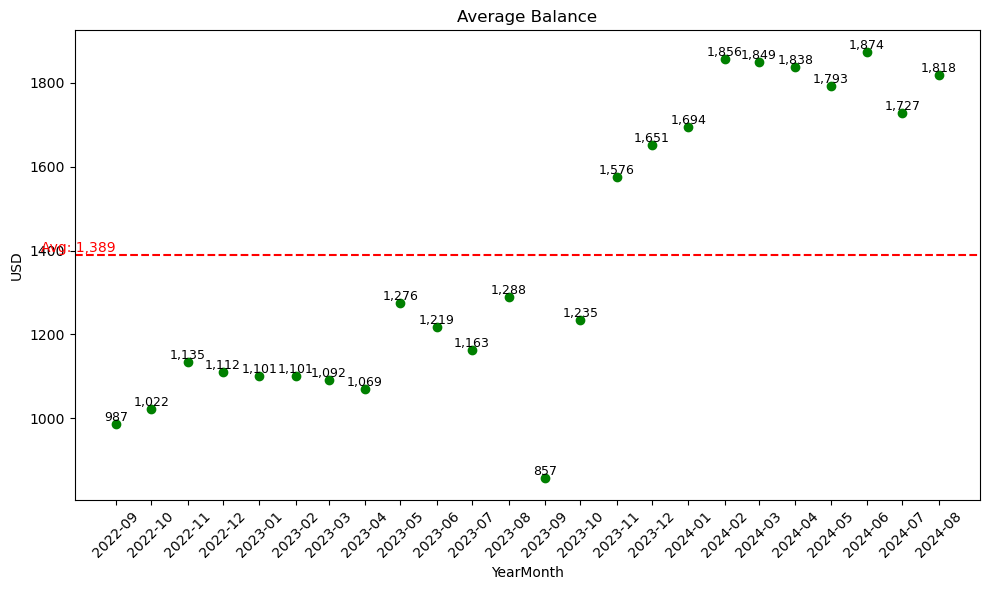

In [256]:
plt.figure(figsize=(10, 6))  # Make the figure wider
plt.scatter(df_cur_balance_avg['year_month_date'], df_cur_balance_avg['current_balance'], color='green')

# Add labels and title
plt.xlabel('YearMonth')
plt.ylabel('USD')
plt.title('Average Balance')

# Rotate x-axis labels for better readability (optional)

x_labels = df_cur_balance_avg['year_month_date'].dt.strftime('%Y-%m-%d')  # Format as string
short_x_labels = x_labels.str.slice(0, 7)  # Get the first 6 letters

plt.xticks(df_cur_balance_avg['year_month_date'], short_x_labels, rotation=45)


# Annotate each point with its y-value (current_balance)
for i, value in enumerate(df_cur_balance_avg['current_balance']):
    plt.text(df_cur_balance_avg['year_month_date'][i], df_cur_balance_avg['current_balance'][i], 
             f'{value:,.0f}', ha='center', va='bottom', fontsize=9)

plt.axhline(y=df_average, color='red', linestyle='--', label=f'Average DPD: {df_average:,.0f}')

plt.text(df_dpd['year_month_date'].min(), df_average, f'Avg: {df_average:,.0f}', 
         color='red', va='bottom', ha='right', fontsize=10)

# Show plot
plt.tight_layout()  # To make sure labels are not cut off
plt.show()

In [258]:
#increase in average value of tickets. Outlier in Sep 2023.

In [270]:
####DPD
df_dpd=df.groupby('year_month_date')[['dpd']].mean().reset_index().copy()


In [272]:
df_average = df_dpd['dpd'].mean()

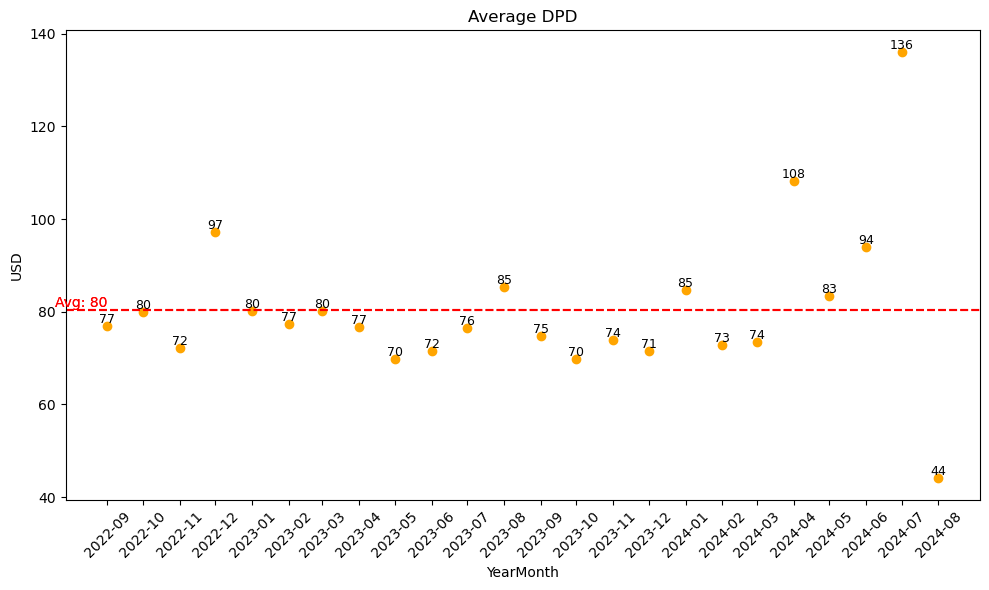

In [274]:
plt.figure(figsize=(10, 6))  # Make the figure wider
plt.scatter(df_dpd['year_month_date'], df_dpd['dpd'], color='orange')

# Add labels and title
plt.xlabel('YearMonth')
plt.ylabel('USD')
plt.title('Average DPD')

# Rotate x-axis labels for better readability (optional)

x_labels = df_dpd['year_month_date'].dt.strftime('%Y-%m-%d')  # Format as string
short_x_labels = x_labels.str.slice(0, 7)  # Get the first 6 letters

plt.xticks(df_dpd['year_month_date'], short_x_labels, rotation=45)


# Annotate each point with its y-value (dpd)
for i, value in enumerate(df_dpd['dpd']):
    plt.text(df_dpd['year_month_date'][i], df_dpd['dpd'][i], 
             f'{value:,.0f}', ha='center', va='bottom', fontsize=9)

plt.axhline(y=df_average, color='red', linestyle='--', label=f'Average DPD: {df_average:,.0f}')

plt.text(df_dpd['year_month_date'].min(), df_average, f'Avg: {df_average:,.0f}', 
         color='red', va='bottom', ha='right', fontsize=10)

plt.axhline(y=df_average, color='red', linestyle='--', label=f'Average DPD: {df_average:,.0f}')

plt.text(df_dpd['year_month_date'].min(), df_average, f'Avg: {df_average:,.0f}', 
         color='red', va='bottom', ha='right', fontsize=10)

# Show plot
plt.tight_layout()  # To make sure labels are not cut off
plt.show()

In [ ]:
###Around average, besides last months

In [ ]:
###DCA PLacement

In [284]:

df_dca=df.groupby('year_month_date')[['dca_placement']].mean().reset_index().copy()

In [278]:
df_average = df_dca['dca_placement'].mean()

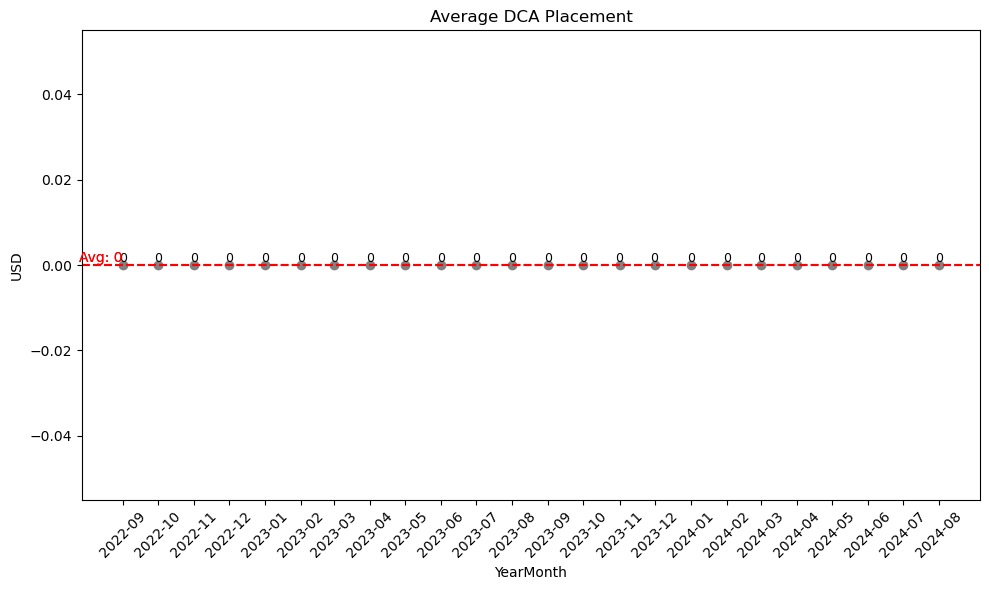

In [280]:
plt.figure(figsize=(10, 6))  # Make the figure wider
plt.scatter(df_dca['year_month_date'], df_dca['dca_placement'], color='gray')

# Add labels and title
plt.xlabel('YearMonth')
plt.ylabel('USD')
plt.title('Average DCA Placement')

# Rotate x-axis labels for better readability (optional)

x_labels = df_dca['year_month_date'].dt.strftime('%Y-%m-%d')  # Format as string
short_x_labels = x_labels.str.slice(0, 7)  # Get the first 6 letters

plt.xticks(df_dca['year_month_date'], short_x_labels, rotation=45)


# Annotate each point with its y-value (dca_placement)
for i, value in enumerate(df_dca['dca_placement']):
    plt.text(df_dca['year_month_date'][i], df_dca['dca_placement'][i], 
             f'{value:,.0f}', ha='center', va='bottom', fontsize=9)

plt.axhline(y=df_average, color='red', linestyle='--', label=f'Average DPD: {df_average:,.0f}')

plt.text(df_dca['year_month_date'].min(), df_average, f'Avg: {df_average:,.0f}', 
         color='red', va='bottom', ha='right', fontsize=10)

plt.axhline(y=df_average, color='red', linestyle='--', label=f'Average DPD: {df_average:,.0f}')

plt.text(df_dca['year_month_date'].min(), df_average, f'Avg: {df_average:,.0f}', 
         color='red', va='bottom', ha='right', fontsize=10)

# Show plot
plt.tight_layout()  # To make sure labels are not cut off
plt.show()

In [ ]:
###zero

In [ ]:
### Amount of accounts

In [286]:
df_accounts=df.groupby('year_month_date')[['ak_id']].count().reset_index().copy()